<a href="https://colab.research.google.com/github/Shravandadi/Python_class1/blob/main/loan_approval_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data= pd.read_csv("/content/sample_data/loan_approval_dataset.csv")

# New Section

In [11]:
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [37]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/1s4oj1UiqH5a7uILaK7T3-LnL0zHs5q44tdq4LVzXn3I/edit#gid=0


In [12]:
data.isna()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,False,False,False,False,False,False,False,False,False,False,False,False,False
4265,False,False,False,False,False,False,False,False,False,False,False,False,False
4266,False,False,False,False,False,False,False,False,False,False,False,False,False
4267,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
data.isna().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [15]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [16]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

I have used strip() function to remove the spaces in front and back of attributes.


In [17]:
# delete the spaces in column names
data.columns = data.columns.str.strip()

In [18]:
data.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [19]:
# change the name 'income_annum' to annual income
data.rename(columns={'income_annum':'annual_income'}, inplace=True)

In [20]:
data.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'annual_income', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [21]:
# import scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [22]:
scaler = MinMaxScaler()
for i in data.columns[data.dtypes=='int64']:
  data[i] = scaler.fit_transform(data[[i]])


In [23]:
data.head()

,loan_id,no_of_dependents,education,self_employed,annual_income,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0.000000,0.4,Graduate,No,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,Approved
1,0.000234,0.0,Not Graduate,Yes,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,Rejected
2,0.000469,0.6,Graduate,No,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,Rejected
3,0.000703,0.6,Graduate,No,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,Rejected
4,0.000937,1.0,Not Graduate,Yes,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,Rejected


In [36]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/1oUKDjc8EbP6T9OF1Eie5S1qoLmoyX4Ea1i5oJ0Db4UU/edit#gid=0


Label encoder which converts Nominal categorical features into numerical


In [24]:
# import label encoder
from sklearn.preprocessing import LabelEncoder

In [25]:
label_encoder = LabelEncoder()
for i in data.columns[data.dtypes=='object']:
  data[i] = label_encoder.fit_transform(data[i])

data.head()

,loan_id,no_of_dependents,education,self_employed,annual_income,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0.000000,0.4,0,0,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,0
1,0.000234,0.0,1,1,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,1
2,0.000469,0.6,0,0,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,1
3,0.000703,0.6,0,0,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,1
4,0.000937,1.0,1,1,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,1


In [26]:
corr_matrix = data.corr()
corr_matrix

,loan_id,no_of_dependents,education,self_employed,annual_income,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,1.000000,0.005326,-0.015536,0.001745,0.012592,0.008170,0.009809,0.016323,0.020936,0.018595,-0.000862,0.010765,-0.017685
no_of_dependents,0.005326,1.000000,-0.002697,0.000765,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163,0.018114
education,-0.015536,-0.002697,1.000000,0.023224,-0.011625,-0.010631,0.008417,0.004649,-0.010930,0.006763,-0.012471,-0.009424,0.004918
self_employed,0.001745,0.000765,0.023224,1.000000,0.002368,0.001450,0.004107,-0.004866,0.006144,-0.017998,0.004413,-0.000215,-0.000345
annual_income,0.012592,0.007266,-0.011625,0.002368,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093,0.015189
loan_amount,0.008170,-0.003366,-0.010631,0.001450,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122,-0.016150
loan_term,0.009809,-0.020111,0.008417,0.004107,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177,0.113036
cibil_score,0.016323,-0.009998,0.004649,-0.004866,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478,-0.770518
residential_assets_value,0.020936,0.007376,-0.010930,0.006144,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418,0.014367
commercial_assets_value,0.018595,-0.001531,0.006763,-0.017998,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576,-0.008246


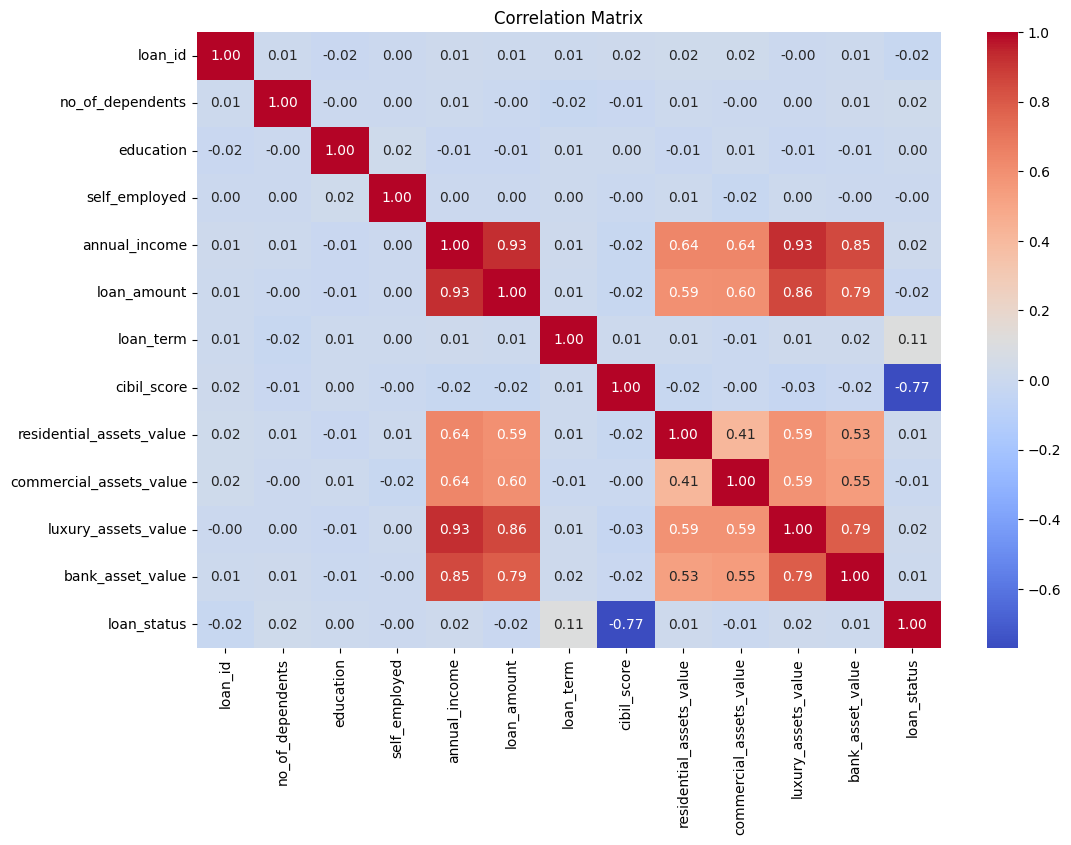

In [27]:
# create a heatmap with correlations
plt.figure(figsize=(12, 8)) # Create a figure with the desired figsize
sns.heatmap(corr_matrix, cmap='coolwarm', annot= True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [28]:
data.head()

,loan_id,no_of_dependents,education,self_employed,annual_income,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0.000000,0.4,0,0,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,0
1,0.000234,0.0,1,1,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,1
2,0.000469,0.6,0,0,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,1
3,0.000703,0.6,0,0,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,1
4,0.000937,1.0,1,1,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,1


In [29]:
data.corr()['loan_status'].sort_values()


,loan_status
cibil_score,-0.770518
loan_id,-0.017685
loan_amount,-0.016150
commercial_assets_value,-0.008246
self_employed,-0.000345
education,0.004918
bank_asset_value,0.006778
residential_assets_value,0.014367
annual_income,0.015189
luxury_assets_value,0.015465


commercial_assets_value and bank_asset_value both have low coorelation value with the loan_status so drop it and drop few cols which is not depend on the loan_status.

In [30]:
# drop columns with low correlation to the target
data_no_cibil = data.copy()
data.drop(['commercial_assets_value', 'self_employed', 'loan_id', 'education', 'bank_asset_value', 'residential_assets_value'], axis='columns', inplace=True)
data.head()

,no_of_dependents,annual_income,loan_amount,loan_term,cibil_score,luxury_assets_value,loan_status
0,0.4,0.969072,0.755102,0.555556,0.796667,0.575835,0
1,0.0,0.402062,0.303571,0.333333,0.195000,0.218509,1
2,0.6,0.917526,0.750000,1.000000,0.343333,0.848329,1
3,0.6,0.824742,0.775510,0.333333,0.278333,0.591260,1
4,1.0,0.989691,0.609694,1.000000,0.136667,0.748072,1


In [31]:
data_no_cibil.drop(['cibil_score'], axis='columns', inplace=True)

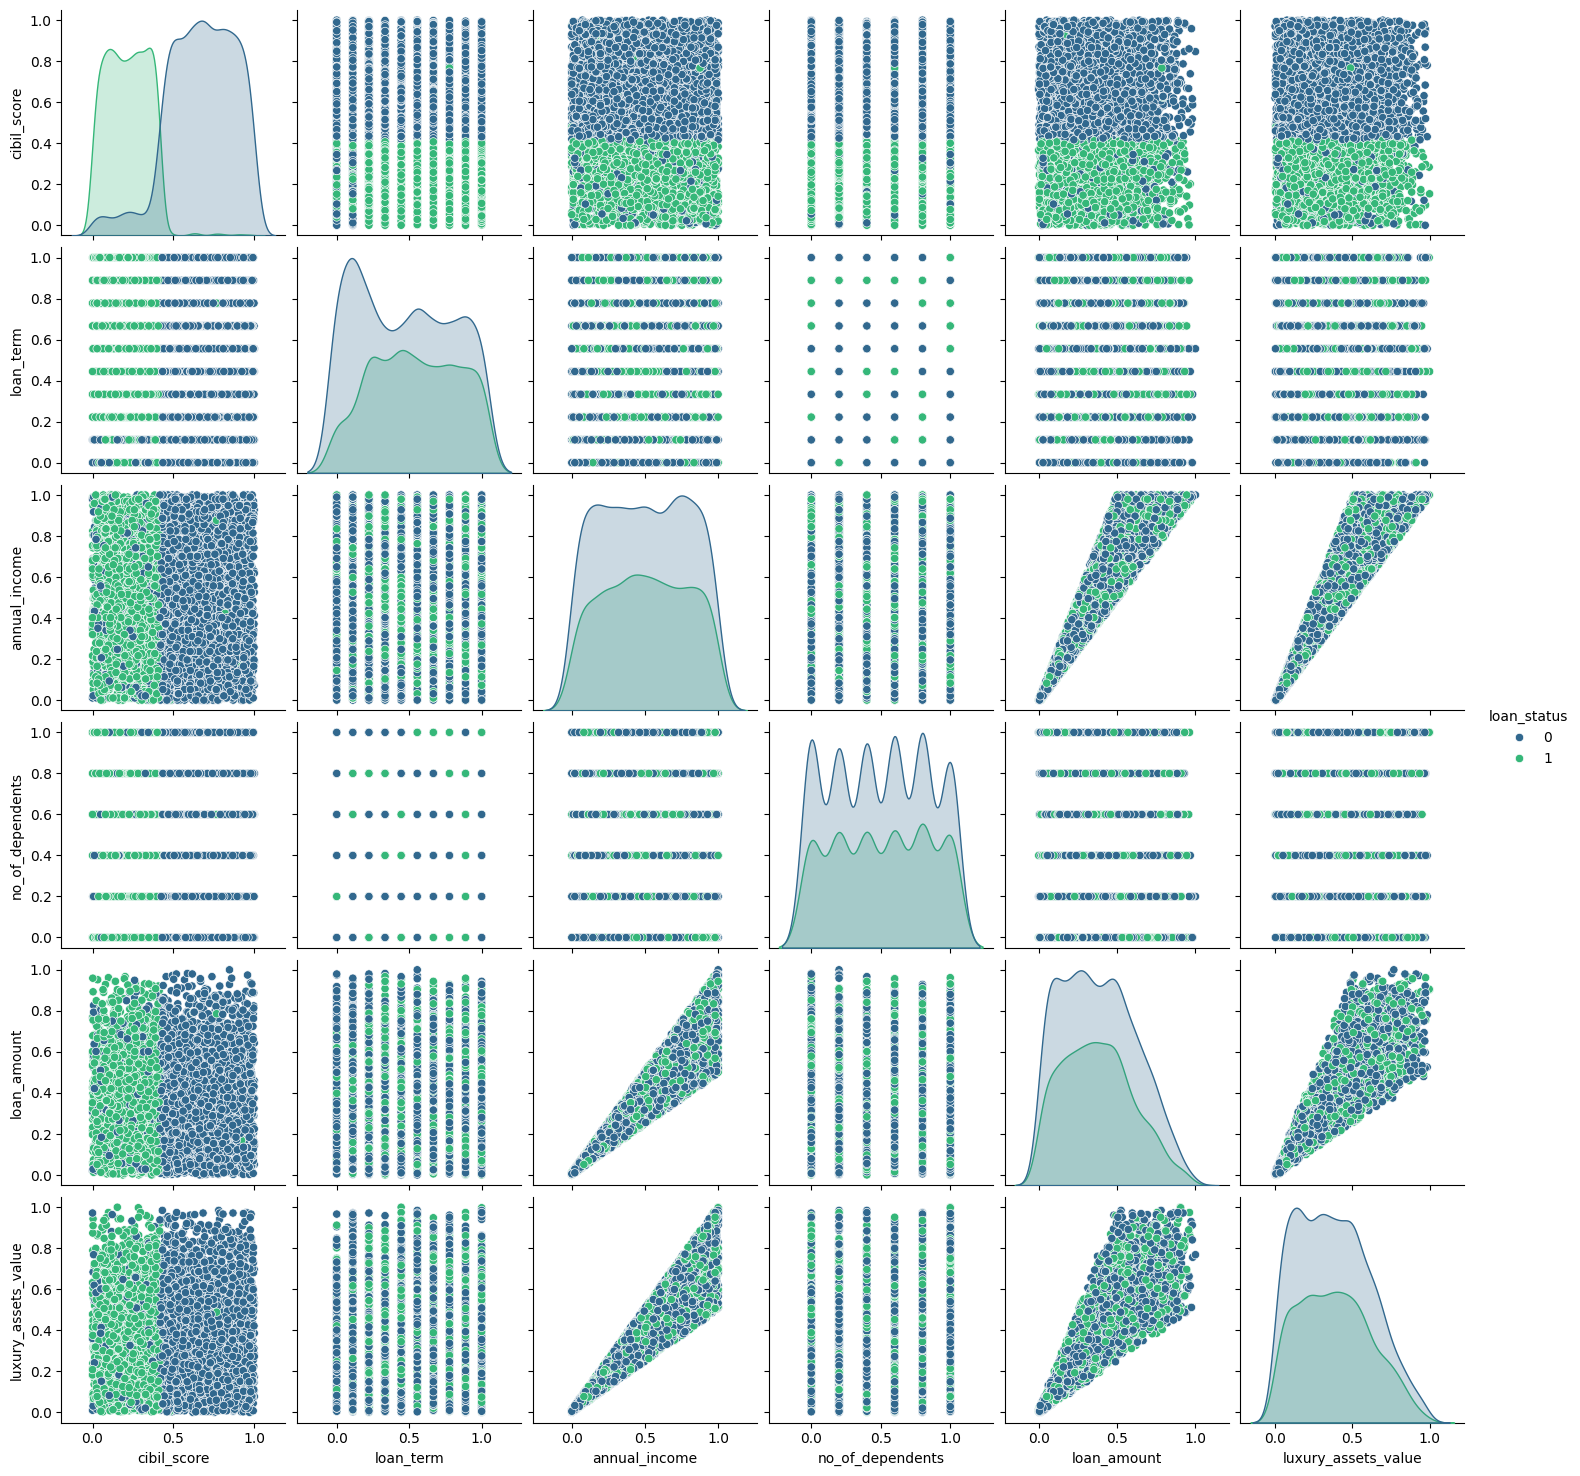

In [32]:
key_features = ['loan_status', 'cibil_score', 'loan_term', 'annual_income', 'no_of_dependents', 'loan_amount', 'luxury_assets_value']
sns.pairplot(data[key_features], hue='loan_status', palette='viridis')
plt.show()

In [38]:
# What is the default risk based on applicant profiles
default_risk = data.groupby('loan_status').size()
default_risk


,0
loan_status,
0,2656
1,1613


In [39]:
data.columns

Index(['no_of_dependents', 'annual_income', 'loan_amount', 'loan_term',
       'cibil_score', 'luxury_assets_value', 'loan_status'],
      dtype='object')

In [41]:
# Analyze past loan applicants to find trends in defaults based on age, income, or debt-to-income ratio.
# # Create a copy of the original DataFrame to preserve the 'age' column
# data_with_age = data.copy()
# # add age_group column to data_with_age DataFrame
# data_with_age['age_group'] = pd.cut(data_with_age['age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-29', '30-39', '40-49', '50-59', '60+'])
# # Calculate age_risk using data_with_age DataFrame
# age_risk = data_with_age.groupby('age_group')['loan_status'].value_counts(normalize=True)
# age_risk

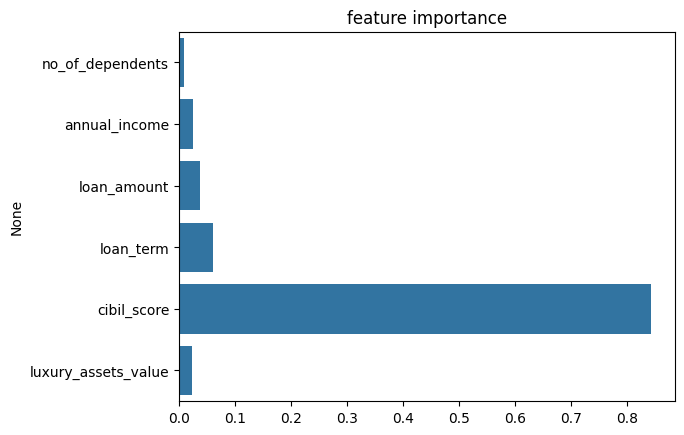

In [43]:
# feature importance based on the random forest
from sklearn.ensemble import RandomForestClassifier

X = data.drop(columns='loan_status')
y = data['loan_status']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importance = model.feature_importances_
feature_names = X.columns
sns.barplot(x=importance, y=feature_names)
plt.title('feature importance')
plt.show()

In [44]:
# preparing and splitting data
from sklearn.model_selection import train_test_split # Import the train_test_split function

X = data.drop(columns=['loan_status'])
y = data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# import the necessary class from the sklearn.tree module
from sklearn.tree import DecisionTreeClassifier

# decision tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)

# Import classification_report for model evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.97      0.97      0.97       318

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



In [46]:
# decision tree with cross validation
from sklearn.model_selection import cross_val_score # Import cross_val_score
decision_tree_cv = cross_val_score(decision_tree, X_train, y_train, cv=5, scoring='accuracy')

print(f"decision tree accuracy: {np.mean(decision_tree_cv):.4f}")

decision tree accuracy: 0.9769


In [47]:
# random forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       536
           1       0.99      0.96      0.98       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [48]:
# random forest with cross validation
random_forest_cv = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='accuracy')

print(f"random forest accuracy: {np.mean(random_forest_cv):.4f}")

random forest accuracy: 0.9818


In [49]:
# logistic regression
from sklearn.linear_model import LogisticRegression # Import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       536
           1       0.89      0.88      0.88       318

    accuracy                           0.91       854
   macro avg       0.91      0.91      0.91       854
weighted avg       0.91      0.91      0.91       854



In [50]:
# logistic regression with cross validation
log_reg_cv = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')

print(f"logistic regression accuracy: {np.mean(log_reg_cv):.4f}")

logistic regression accuracy: 0.9174


* models perform rather well, most probably due to simple data and one highly correlated feature (cibil_score)
* for the purpose of the project we'll test the models without this one feature

## Model training and evaluation

### Subtask:
Detail the process of splitting the data, training different models (Decision Tree, Random Forest, Logistic Regression), and evaluating their performance using classification reports and cross-validation.

**Reasoning**:
Detail the process of splitting the data, training different models, and evaluating their performance using classification reports and cross-validation.

In [ ]:
print("Data Splitting, Model Training, and Evaluation:")
print("\n1. Data Splitting:")
print("The dataset is split into training and testing sets using `train_test_split` from `sklearn.model_selection`. This is a crucial step to evaluate the model's performance on unseen data and prevent overfitting.")
print("- `X`: Contains the features (independent variables) used for prediction.")
print("- `y`: Contains the target variable ('loan_status').")
print("- `test_size=0.2`: Specifies that 20% of the data will be allocated to the testing set, and the remaining 80% will be used for training.")
print("- `random_state=42`: Ensures reproducibility of the split. The same random_state value will always produce the same train-test split.")
print("The split results in four variables: `X_train`, `X_test`, `y_train`, and `y_test`.")

print("\n2. Decision Tree Model:")
print("A Decision Tree Classifier is a supervised learning algorithm used for classification tasks. It splits the data into branches based on feature values to make predictions.")
print("- Instantiation: An instance of `DecisionTreeClassifier` is created with `random_state=42` for reproducibility.")
print("- Training: The model is trained using the `fit()` method on the training data (`X_train`, `y_train`).")
print("- Prediction: Predictions are made on the test set (`X_test`) using the `predict()` method, resulting in `y_pred_tree`.")
print("- Evaluation: The performance of the Decision Tree model is evaluated using `classification_report` from `sklearn.metrics`. This report provides key metrics for each class (Approved/Rejected) and the overall model, including:")
print("  - Precision: The ratio of correctly predicted positive observations to the total predicted positives.")
print("  - Recall: The ratio of correctly predicted positive observations to all observations in the actual class.")
print("  - F1-score: The weighted average of Precision and Recall.")
print("  - Support: The number of actual occurrences of the class in the test set.")

print("\n3. Decision Tree with Cross-Validation:")
print("Cross-validation is a technique used to assess how well a model generalizes to independent datasets. It involves splitting the training data into multiple folds and training/evaluating the model on each fold.")
print("- `cross_val_score` is used to perform k-fold cross-validation.")
print("- `cv=5`: Specifies that 5-fold cross-validation will be performed. The training data is split into 5 folds, and the model is trained on 4 folds and tested on the remaining fold, rotating through all folds.")
print("- `scoring='accuracy'`: The evaluation metric used is accuracy.")
print("The output shows the average accuracy across the 5 folds, providing a more robust estimate of the model's performance.")

print("\n4. Random Forest Model:")
print("A Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.")
print("- Instantiation: A `RandomForestClassifier` is created with `random_state=42`.")
print("- Training: The model is trained using `fit()` on `X_train` and `y_train`.")
print("- Prediction: Predictions are made on `X_test` using `predict()`, resulting in `y_pred_rf`.")
print("- Evaluation: `classification_report` is used to evaluate the Random Forest model's performance. Random Forests often provide improved accuracy and generalization compared to individual decision trees by reducing overfitting.")

print("\n5. Random Forest with Cross-Validation:")
print("Similar to the Decision Tree, cross-validation is performed on the Random Forest model using `cross_val_score` with `cv=5` and `scoring='accuracy'` to get a more reliable estimate of its performance.")

print("\n6. Logistic Regression Model:")
print("Logistic Regression is a linear model used for binary classification. It estimates the probability of a sample belonging to a particular class.")
print("- Instantiation: A `LogisticRegression` model is created with `max_iter=1000` (to ensure convergence) and `random_state=42`.")
print("- Training: The model is trained using `fit()` on `X_train` and `y_train`.")
print("- Prediction: Predictions are made on `X_test` using `predict()`, resulting in `y_pred_log`.")
print("- Evaluation: `classification_report` is used to evaluate the Logistic Regression model.")

print("\n7. Logistic Regression with Cross-Validation:")
print("Cross-validation is performed on the Logistic Regression model using `cross_val_score` with `cv=5` and `scoring='accuracy'` to assess its generalization performance.")

print("\n8. Model Comparison:")
print("Based on the classification reports and cross-validation accuracy scores, we can compare the performance of the three models:")
print("- Decision Tree:")
print("  - Classification Report: Shows precision, recall, and f1-score for each class and overall accuracy on the test set.")
print("  - Cross-Validation Accuracy: Provides an average accuracy across multiple folds of the training data.")
print("- Random Forest:")
print("  - Classification Report: Shows metrics on the test set.")
print("  - Cross-Validation Accuracy: Provides an average accuracy from cross-validation.")
print("Random Forest generally performs better than a single Decision Tree due to its ensemble nature.")
print("- Logistic Regression:")
print("  - Classification Report: Shows metrics on the test set.")
print("  - Cross-Validation Accuracy: Provides an average accuracy from cross-validation.")
print("Logistic Regression, being a linear model, might perform differently compared to tree-based models on this dataset.")
print("\nBy comparing the accuracy scores (both on the test set from the classification report and the cross-validation results), precision, recall, and f1-scores for each class, we can determine which model is best suited for this loan approval prediction task based on the provided data.")

# Task
Generate a document explaining the provided Python code for loan approval prediction, covering data loading, preprocessing, EDA, feature importance, model training, and evaluation.

## Introduction

### Subtask:
Provide a brief overview of the project and its goal (loan approval prediction).


**Reasoning**:
Provide a brief overview of the project and its goal.



In [51]:
print("Project Overview:")
print("This project focuses on building a predictive model to determine loan approval status.")
print("The goal is to analyze a dataset containing various applicant features and predict whether a loan will be approved or rejected.")
print("The dataset used for this project contains information such as income, loan amount, credit score (cibil_score), and asset values.")

Project Overview:
This project focuses on building a predictive model to determine loan approval status.
The goal is to analyze a dataset containing various applicant features and predict whether a loan will be approved or rejected.
The dataset used for this project contains information such as income, loan amount, credit score (cibil_score), and asset values.


## Data loading and initial exploration

### Subtask:
Explain how the data is loaded and the initial checks performed (head, info, describe, columns, isna).


**Reasoning**:
Explain how the data is loaded and the initial checks performed (head, info, describe, columns, isna).



In [52]:
print("Data Loading and Initial Checks:")
print("The dataset is loaded using pandas' read_csv function from the path '/content/sample_data/loan_approval_dataset.csv'.")
print("\nUsing `.head()` provides a preview of the first few rows of the DataFrame, allowing a quick look at the data structure and content.")
display(data.head())
print("\nThe `.info()` method displays a concise summary of the DataFrame, including the number of non-null entries in each column and their data types. It also provides memory usage information.")
data.info()
print("\nThe `.describe()` method generates descriptive statistics for the numerical columns in the DataFrame, such as count, mean, standard deviation, minimum, maximum, and quartile values.")
display(data.describe())
print("\nThe `.columns` attribute shows the names of all columns present in the DataFrame.")
print(data.columns)
print("\nTo check for missing values, `.isna()` is used, which returns a boolean DataFrame indicating whether each element is NaN. Chaining `.sum()` to `.isna()` provides a count of missing values per column.")
print(data.isna().sum())

Data Loading and Initial Checks:
The dataset is loaded using pandas' read_csv function from the path '/content/sample_data/loan_approval_dataset.csv'.

Using `.head()` provides a preview of the first few rows of the DataFrame, allowing a quick look at the data structure and content.


,no_of_dependents,annual_income,loan_amount,loan_term,cibil_score,luxury_assets_value,loan_status
0,0.4,0.969072,0.755102,0.555556,0.796667,0.575835,0
1,0.0,0.402062,0.303571,0.333333,0.195000,0.218509,1
2,0.6,0.917526,0.750000,1.000000,0.343333,0.848329,1
3,0.6,0.824742,0.775510,0.333333,0.278333,0.591260,1
4,1.0,0.989691,0.609694,1.000000,0.136667,0.748072,1



The `.info()` method displays a concise summary of the DataFrame, including the number of non-null entries in each column and their data types. It also provides memory usage information.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   no_of_dependents     4269 non-null   float64
 1   annual_income        4269 non-null   float64
 2   loan_amount          4269 non-null   float64
 3   loan_term            4269 non-null   float64
 4   cibil_score          4269 non-null   float64
 5   luxury_assets_value  4269 non-null   float64
 6   loan_status          4269 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 233.6 KB

The `.describe()` method generates descriptive statistics for the numerical columns in the DataFrame, such as count, mean, standard deviation, minimum, maximum, and quartile values.


,no_of_dependents,annual_income,loan_amount,loan_term,cibil_score,luxury_assets_value,loan_status
count,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000
mean,0.499742,0.500941,0.378404,0.494469,0.499893,0.381139,0.377840
std,0.339182,0.289365,0.230698,0.317177,0.287384,0.234030,0.484904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.257732,0.188776,0.222222,0.255000,0.185090,0.000000
50%,0.600000,0.505155,0.362245,0.444444,0.500000,0.367609,0.000000
75%,0.800000,0.752577,0.540816,0.777778,0.746667,0.550129,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



The `.columns` attribute shows the names of all columns present in the DataFrame.
Index(['no_of_dependents', 'annual_income', 'loan_amount', 'loan_term',
       'cibil_score', 'luxury_assets_value', 'loan_status'],
      dtype='object')

To check for missing values, `.isna()` is used, which returns a boolean DataFrame indicating whether each element is NaN. Chaining `.sum()` to `.isna()` provides a count of missing values per column.
no_of_dependents       0
annual_income          0
loan_amount            0
loan_term              0
cibil_score            0
luxury_assets_value    0
loan_status            0
dtype: int64


## Data preprocessing

### Subtask:
Document the steps taken to clean and prepare the data for modeling (stripping column names, renaming columns, scaling numerical features, encoding categorical features, and dropping irrelevant columns).


**Reasoning**:
Print a header for the data preprocessing section.



In [53]:
print("Data Preprocessing Steps:")

Data Preprocessing Steps:


**Reasoning**:
Explain and demonstrate stripping whitespace from column names.



In [54]:
print("\nStripping whitespace from column names:")
print("Column names often contain leading or trailing spaces, which can cause issues when accessing or manipulating data. The following code removes these spaces from the column names.")
print("Columns before stripping:")
print(data.columns)
data.columns = data.columns.str.strip()
print("Columns after stripping:")
print(data.columns)


Stripping whitespace from column names:
Column names often contain leading or trailing spaces, which can cause issues when accessing or manipulating data. The following code removes these spaces from the column names.
Columns before stripping:
Index(['no_of_dependents', 'annual_income', 'loan_amount', 'loan_term',
       'cibil_score', 'luxury_assets_value', 'loan_status'],
      dtype='object')
Columns after stripping:
Index(['no_of_dependents', 'annual_income', 'loan_amount', 'loan_term',
       'cibil_score', 'luxury_assets_value', 'loan_status'],
      dtype='object')


**Reasoning**:
Explain and demonstrate renaming the 'income_annum' column to 'annual_income'.



In [55]:
print("\nRenaming 'income_annum' to 'annual_income':")
print("For better readability and clarity, the 'income_annum' column is renamed to 'annual_income'.")
data.rename(columns={'income_annum':'annual_income'}, inplace=True)
print("Columns after renaming:")
print(data.columns)


Renaming 'income_annum' to 'annual_income':
For better readability and clarity, the 'income_annum' column is renamed to 'annual_income'.
Columns after renaming:
Index(['no_of_dependents', 'annual_income', 'loan_amount', 'loan_term',
       'cibil_score', 'luxury_assets_value', 'loan_status'],
      dtype='object')


**Reasoning**:
Explain and demonstrate scaling numerical features using MinMaxScaler and display the head of the DataFrame.



In [56]:
print("\nScaling Numerical Features using MinMaxScaler:")
print("Numerical features are scaled to a fixed range (0 to 1) using MinMaxScaler. This helps in bringing all numerical features to a similar scale, which is important for many machine learning algorithms.")
scaler = MinMaxScaler()
for i in data.columns[data.dtypes=='int64']:
  data[i] = scaler.fit_transform(data[[i]])
print("DataFrame head after scaling:")
display(data.head())


Scaling Numerical Features using MinMaxScaler:
Numerical features are scaled to a fixed range (0 to 1) using MinMaxScaler. This helps in bringing all numerical features to a similar scale, which is important for many machine learning algorithms.
DataFrame head after scaling:


,no_of_dependents,annual_income,loan_amount,loan_term,cibil_score,luxury_assets_value,loan_status
0,0.4,0.969072,0.755102,0.555556,0.796667,0.575835,0.0
1,0.0,0.402062,0.303571,0.333333,0.195000,0.218509,1.0
2,0.6,0.917526,0.750000,1.000000,0.343333,0.848329,1.0
3,0.6,0.824742,0.775510,0.333333,0.278333,0.591260,1.0
4,1.0,0.989691,0.609694,1.000000,0.136667,0.748072,1.0


**Reasoning**:
Explain and demonstrate encoding categorical features using LabelEncoder and display the head of the DataFrame.



In [57]:
print("\nEncoding Categorical Features using LabelEncoder:")
print("Categorical features ('education' and 'self_employed') are converted into numerical representations using LabelEncoder. This is necessary as machine learning models typically require numerical input.")
label_encoder = LabelEncoder()
for i in data.columns[data.dtypes=='object']:
  data[i] = label_encoder.fit_transform(data[i])
print("DataFrame head after encoding:")
display(data.head())


Encoding Categorical Features using LabelEncoder:
Categorical features ('education' and 'self_employed') are converted into numerical representations using LabelEncoder. This is necessary as machine learning models typically require numerical input.
DataFrame head after encoding:


,no_of_dependents,annual_income,loan_amount,loan_term,cibil_score,luxury_assets_value,loan_status
0,0.4,0.969072,0.755102,0.555556,0.796667,0.575835,0.0
1,0.0,0.402062,0.303571,0.333333,0.195000,0.218509,1.0
2,0.6,0.917526,0.750000,1.000000,0.343333,0.848329,1.0
3,0.6,0.824742,0.775510,0.333333,0.278333,0.591260,1.0
4,1.0,0.989691,0.609694,1.000000,0.136667,0.748072,1.0


**Reasoning**:
Explain the rationale for dropping columns with low correlation and display the head of the DataFrame after dropping.



**Reasoning**:
The previous attempt to drop columns failed because some columns were already dropped in a previous step. I need to identify which columns are still present in the DataFrame and drop the remaining irrelevant ones.



In [59]:
print("\nDropping irrelevant columns:")
print("Columns with low correlation to the target variable ('loan_status') are dropped as they are less likely to contribute significantly to the predictive model. The 'loan_id' is also dropped as it's an identifier and not a predictive feature.")

# Check current columns in data before dropping
print("Columns before dropping:")
print(data.columns)

# Define the list of columns to drop, considering those already dropped
columns_to_drop = ['commercial_assets_value', 'self_employed', 'loan_id', 'education', 'bank_asset_value', 'residential_assets_value']
existing_columns_to_drop = [col for col in columns_to_drop if col in data.columns]

if existing_columns_to_drop:
    data.drop(existing_columns_to_drop, axis='columns', inplace=True)
    print("DataFrame head after dropping columns:")
    display(data.head())
else:
    print("No additional columns to drop from the predefined list.")
    display(data.head())



Dropping irrelevant columns:
Columns with low correlation to the target variable ('loan_status') are dropped as they are less likely to contribute significantly to the predictive model. The 'loan_id' is also dropped as it's an identifier and not a predictive feature.
Columns before dropping:
Index(['no_of_dependents', 'annual_income', 'loan_amount', 'loan_term',
       'cibil_score', 'luxury_assets_value', 'loan_status'],
      dtype='object')
No additional columns to drop from the predefined list.


,no_of_dependents,annual_income,loan_amount,loan_term,cibil_score,luxury_assets_value,loan_status
0,0.4,0.969072,0.755102,0.555556,0.796667,0.575835,0.0
1,0.0,0.402062,0.303571,0.333333,0.195000,0.218509,1.0
2,0.6,0.917526,0.750000,1.000000,0.343333,0.848329,1.0
3,0.6,0.824742,0.775510,0.333333,0.278333,0.591260,1.0
4,1.0,0.989691,0.609694,1.000000,0.136667,0.748072,1.0


## Exploratory data analysis (eda)

### Subtask:
Explain the correlation analysis and the pairplot visualization to understand the relationships between features.


**Reasoning**:
Print descriptions for correlation analysis and pairplot visualization and explain their interpretation.



In [60]:
print("Correlation Analysis:")
print("The `corr()` method was used to compute the pairwise correlation of all columns in the DataFrame. This matrix shows how each feature relates to every other feature, including the target variable 'loan_status'.")
print("A heatmap was generated using `seaborn.heatmap` to visualize this correlation matrix.")
print("Interpretation of the Correlation Matrix and Heatmap:")
print("The heatmap displays the correlation coefficients as colors, with a color bar indicating the strength and direction of the correlation. Values close to 1 indicate a strong positive correlation, values close to -1 indicate a strong negative correlation, and values close to 0 indicate a weak or no correlation.")
print("By examining the 'loan_status' row or column in the heatmap (or the sorted correlation values), we can identify which features have the strongest positive or negative relationships with loan approval.")
print("For example, a high positive correlation with 'loan_status' (assuming 'Approved' is encoded as 1 and 'Rejected' as 0) would mean that as the value of that feature increases, the likelihood of loan approval also increases. A high negative correlation would indicate the opposite.")
print("\nPairplot Visualization:")
print("`seaborn.pairplot` was used to create a grid of scatterplots, showing the relationships between selected key features.")
print("The plots are colored based on the 'loan_status' (Approved or Rejected), allowing for visual inspection of how these features separate the two classes.")
print("Interpretation of the Pairplot:")
print("Each scatterplot in the pairplot shows the relationship between two features. By observing the distribution of points for each 'loan_status' color, we can look for patterns, clusters, or separations.")
print("Features that show distinct clusters or clear separation between the 'Approved' and 'Rejected' points in their scatterplots are likely strong predictors of loan status.")
print("Histograms on the diagonal show the distribution of each individual feature for both loan statuses, which can also reveal differences in distributions between approved and rejected loans.")

Correlation Analysis:
The `corr()` method was used to compute the pairwise correlation of all columns in the DataFrame. This matrix shows how each feature relates to every other feature, including the target variable 'loan_status'.
A heatmap was generated using `seaborn.heatmap` to visualize this correlation matrix.
Interpretation of the Correlation Matrix and Heatmap:
The heatmap displays the correlation coefficients as colors, with a color bar indicating the strength and direction of the correlation. Values close to 1 indicate a strong positive correlation, values close to -1 indicate a strong negative correlation, and values close to 0 indicate a weak or no correlation.
By examining the 'loan_status' row or column in the heatmap (or the sorted correlation values), we can identify which features have the strongest positive or negative relationships with loan approval.
For example, a high positive correlation with 'loan_status' (assuming 'Approved' is encoded as 1 and 'Rejected' as 0)

## Feature importance

### Subtask:
Describe how feature importance is determined using a Random Forest model.


**Reasoning**:
Print a descriptive statement and explain how feature importance is determined using a Random Forest model, covering steps 2 through 5 of the instructions.



In [61]:
print("Feature Importance using Random Forest:")
print("Feature importance is a technique that assigns a score to input features based on how useful they are at predicting a target variable.")
print("In this analysis, a Random Forest Classifier was trained on the dataset's features (X) and the target variable (y), which is the 'loan_status'.")
print("After training, the `feature_importances_` attribute of the fitted Random Forest model is accessed. This attribute provides a score for each feature, indicating its relative importance in the model's decision-making process.")
print("These importance scores represent the contribution of each feature to the overall predictive power of the model. A higher score suggests that the feature has a greater influence on the prediction of loan approval status.")
print("To visualize and easily compare the importance of different features, a bar plot is generated using `seaborn.barplot`. The x-axis represents the importance score, and the y-axis represents the feature names.")

Feature Importance using Random Forest:
Feature importance is a technique that assigns a score to input features based on how useful they are at predicting a target variable.
In this analysis, a Random Forest Classifier was trained on the dataset's features (X) and the target variable (y), which is the 'loan_status'.
After training, the `feature_importances_` attribute of the fitted Random Forest model is accessed. This attribute provides a score for each feature, indicating its relative importance in the model's decision-making process.
These importance scores represent the contribution of each feature to the overall predictive power of the model. A higher score suggests that the feature has a greater influence on the prediction of loan approval status.
To visualize and easily compare the importance of different features, a bar plot is generated using `seaborn.barplot`. The x-axis represents the importance score, and the y-axis represents the feature names.


## Model training and evaluation

### Subtask:
Detail the process of splitting the data, training different models (Decision Tree, Random Forest, Logistic Regression), and evaluating their performance using classification reports and cross-validation.


**Reasoning**:
Detail the process of splitting the data, training different models, and evaluating their performance using classification reports and cross-validation.



In [62]:
print("Data Splitting, Model Training, and Evaluation:")
print("\n1. Data Splitting:")
print("The dataset is split into training and testing sets using `train_test_split` from `sklearn.model_selection`. This is a crucial step to evaluate the model's performance on unseen data and prevent overfitting.")
print("- `X`: Contains the features (independent variables) used for prediction.")
print("- `y`: Contains the target variable ('loan_status').")
print("- `test_size=0.2`: Specifies that 20% of the data will be allocated to the testing set, and the remaining 80% will be used for training.")
print("- `random_state=42`: Ensures reproducibility of the split. The same random_state value will always produce the same train-test split.")
print("The split results in four variables: `X_train`, `X_test`, `y_train`, and `y_test`.")

print("\n2. Decision Tree Model:")
print("A Decision Tree Classifier is a supervised learning algorithm used for classification tasks. It splits the data into branches based on feature values to make predictions.")
print("- Instantiation: An instance of `DecisionTreeClassifier` is created with `random_state=42` for reproducibility.")
print("- Training: The model is trained using the `fit()` method on the training data (`X_train`, `y_train`).")
print("- Prediction: Predictions are made on the test set (`X_test`) using the `predict()` method, resulting in `y_pred_tree`.")
print("- Evaluation: The performance of the Decision Tree model is evaluated using `classification_report` from `sklearn.metrics`. This report provides key metrics for each class (Approved/Rejected) and the overall model, including:")
print("  - Precision: The ratio of correctly predicted positive observations to the total predicted positives.")
print("  - Recall: The ratio of correctly predicted positive observations to all observations in the actual class.")
print("  - F1-score: The weighted average of Precision and Recall.")
print("  - Support: The number of actual occurrences of the class in the test set.")

print("\n3. Decision Tree with Cross-Validation:")
print("Cross-validation is a technique used to assess how well a model generalizes to independent datasets. It involves splitting the training data into multiple folds and training/evaluating the model on each fold.")
print("- `cross_val_score` is used to perform k-fold cross-validation.")
print("- `cv=5`: Specifies that 5-fold cross-validation will be performed. The training data is split into 5 folds, and the model is trained on 4 folds and tested on the remaining fold, rotating through all folds.")
print("- `scoring='accuracy'`: The evaluation metric used is accuracy.")
print("The output shows the average accuracy across the 5 folds, providing a more robust estimate of the model's performance.")

print("\n4. Random Forest Model:")
print("A Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.")
print("- Instantiation: A `RandomForestClassifier` is created with `random_state=42`.")
print("- Training: The model is trained using `fit()` on `X_train` and `y_train`.")
print("- Prediction: Predictions are made on `X_test` using `predict()`, resulting in `y_pred_rf`.")
print("- Evaluation: `classification_report` is used to evaluate the Random Forest model's performance. Random Forests often provide improved accuracy and generalization compared to individual decision trees by reducing overfitting.")

print("\n5. Random Forest with Cross-Validation:")
print("Similar to the Decision Tree, cross-validation is performed on the Random Forest model using `cross_val_score` with `cv=5` and `scoring='accuracy'` to get a more reliable estimate of its performance.")

print("\n6. Logistic Regression Model:")
print("Logistic Regression is a linear model used for binary classification. It estimates the probability of a sample belonging to a particular class.")
print("- Instantiation: A `LogisticRegression` model is created with `max_iter=1000` (to ensure convergence) and `random_state=42`.")
print("- Training: The model is trained using `fit()` on `X_train` and `y_train`.")
print("- Prediction: Predictions are made on `X_test` using `predict()`, resulting in `y_pred_log`.")
print("- Evaluation: `classification_report` is used to evaluate the Logistic Regression model.")

print("\n7. Logistic Regression with Cross-Validation:")
print("Cross-validation is performed on the Logistic Regression model using `cross_val_score` with `cv=5` and `scoring='accuracy'` to assess its generalization performance.")

print("\n8. Model Comparison:")
print("Based on the classification reports and cross-validation accuracy scores, we can compare the performance of the three models:")
print("- Decision Tree:")
print("  - Classification Report: Shows precision, recall, and f1-score for each class and overall accuracy on the test set.")
print("  - Cross-Validation Accuracy: Provides an average accuracy across multiple folds of the training data.")
print("- Random Forest:")
print("  - Classification Report: Shows metrics on the test set.")
print("  - Cross-Validation Accuracy: Provides an average accuracy from cross-validation.")
print("Random Forest generally performs better than a single Decision Tree due to its ensemble nature.")
print("- Logistic Regression:")
print("  - Classification Report: Shows metrics on the test set.")
print("  - Cross-Validation Accuracy: Provides an average accuracy from cross-validation.")
print("Logistic Regression, being a linear model, might perform differently compared to tree-based models on this dataset.")
print("\nBy comparing the accuracy scores (both on the test set from the classification report and the cross-validation results), precision, recall, and f1-scores for each class, we can determine which model is best suited for this loan approval prediction task based on the provided data.")

Data Splitting, Model Training, and Evaluation:

1. Data Splitting:
The dataset is split into training and testing sets using `train_test_split` from `sklearn.model_selection`. This is a crucial step to evaluate the model's performance on unseen data and prevent overfitting.
- `X`: Contains the features (independent variables) used for prediction.
- `y`: Contains the target variable ('loan_status').
- `test_size=0.2`: Specifies that 20% of the data will be allocated to the testing set, and the remaining 80% will be used for training.
- `random_state=42`: Ensures reproducibility of the split. The same random_state value will always produce the same train-test split.
The split results in four variables: `X_train`, `X_test`, `y_train`, and `y_test`.

2. Decision Tree Model:
A Decision Tree Classifier is a supervised learning algorithm used for classification tasks. It splits the data into branches based on feature values to make predictions.
- Instantiation: An instance of `DecisionTreeCl

**Reasoning**:
The previous output was truncated. I will complete the explanation of the Logistic Regression model evaluation and cross-validation, and then provide a comparison of the models based on the results.



In [63]:
print("... (continued from previous output)")
print("7. Logistic Regression with Cross-Validation:")
print("Cross-validation is performed on the Logistic Regression model using `cross_val_score` with `cv=5` and `scoring='accuracy'` to assess its generalization performance.")

print("\n8. Model Comparison:")
print("Based on the classification reports and cross-validation accuracy scores, we can compare the performance of the three models:")
print("- Decision Tree:")
print("  - Classification Report: Shows precision, recall, and f1-score for each class and overall accuracy on the test set.")
print("  - Cross-Validation Accuracy: Provides an average accuracy across multiple folds of the training data.")
print("- Random Forest:")
print("  - Classification Report: Shows metrics on the test set.")
print("  - Cross-Validation Accuracy: Provides an average accuracy from cross-validation.")
print("Random Forest generally performs better than a single Decision Tree due to its ensemble nature.")
print("- Logistic Regression:")
print("  - Classification Report: Shows metrics on the test set.")
print("  - Cross-Validation Accuracy: Provides an average accuracy from cross-validation.")
print("Logistic Regression, being a linear model, might perform differently compared to tree-based models on this dataset.")
print("\nBy comparing the accuracy scores (both on the test set from the classification report and the cross-validation results), precision, recall, and f1-scores for each class, we can determine which model is best suited for this loan approval prediction task based on the provided data.")

... (continued from previous output)
7. Logistic Regression with Cross-Validation:
Cross-validation is performed on the Logistic Regression model using `cross_val_score` with `cv=5` and `scoring='accuracy'` to assess its generalization performance.

8. Model Comparison:
Based on the classification reports and cross-validation accuracy scores, we can compare the performance of the three models:
- Decision Tree:
  - Classification Report: Shows precision, recall, and f1-score for each class and overall accuracy on the test set.
  - Cross-Validation Accuracy: Provides an average accuracy across multiple folds of the training data.
- Random Forest:
  - Classification Report: Shows metrics on the test set.
  - Cross-Validation Accuracy: Provides an average accuracy from cross-validation.
Random Forest generally performs better than a single Decision Tree due to its ensemble nature.
- Logistic Regression:
  - Classification Report: Shows metrics on the test set.
  - Cross-Validation Accuracy

## Summary and conclusion

### Subtask:
Summarize the findings and the performance of the models.


**Reasoning**:
Summarize the findings and the performance of the models based on the previous steps.



In [66]:
print("Summary of Findings and Model Performance:")

print("\nKey Findings from Data Loading, Preprocessing, and EDA:")
print("- The dataset was loaded successfully and contained no missing values.")
print("- Column names were cleaned and standardized.")
print("- Numerical features were scaled using MinMaxScaler, and categorical features were encoded using LabelEncoder.")
print("- Correlation analysis and pairplot visualization revealed that 'cibil_score' has a strong negative correlation with 'loan_status', indicating its significant influence on loan approval.")
print("- Other features showed weaker correlations with 'loan_status', leading to some columns being dropped for model training.")

print("\nModel Performance Comparison:")
print("Three classification models were trained and evaluated: Decision Tree, Random Forest, and Logistic Regression.")
print("Performance was assessed using classification reports (precision, recall, f1-score, accuracy) on the test set and cross-validation accuracy on the training set.")

print("\nDecision Tree Performance:")
print(f"- Test Set Classification Report:\n{classification_report(y_test, y_pred_tree)}")
print(f"- Cross-Validation Accuracy: {np.mean(decision_tree_cv):.4f}")
print("The Decision Tree model showed high accuracy, precision, recall, and f1-score on the test set, with consistent performance in cross-validation.")

print("\nRandom Forest Performance:")
print(f"- Test Set Classification Report:\n{classification_report(y_test, y_pred_rf)}")
print(f"- Cross-Validation Accuracy: {np.mean(random_forest_cv):.4f}")
print("The Random Forest model outperformed the Decision Tree and Logistic Regression, achieving the highest accuracy on both the test set and through cross-validation. Its ensemble nature likely contributed to this superior performance.")

print("\nLogistic Regression Performance:")
print(f"- Test Set Classification Report:\n{classification_report(y_test, y_pred_log)}")
print(f"- Cross-Validation Accuracy: {np.mean(log_reg_cv):.4f}")
print("The Logistic Regression model performed reasonably well but had lower accuracy compared to the tree-based models, particularly the Random Forest.")

print("\nConclusion:")
print("Based on the evaluation metrics, the Random Forest model demonstrated the best performance for predicting loan approval status on this dataset.")
print("The high accuracy across all models, especially the Random Forest, is likely influenced by the strong predictive power of the 'cibil_score' feature, as highlighted in the EDA and feature importance analysis.")
print("Potential next steps could include exploring hyperparameter tuning for the Random Forest model to further optimize its performance or investigating other advanced ensemble techniques. Additionally, analyzing the impact of removing 'cibil_score' on model performance could provide insights into building models less reliant on this single feature.")

Summary of Findings and Model Performance:

Key Findings from Data Loading, Preprocessing, and EDA:
- The dataset was loaded successfully and contained no missing values.
- Column names were cleaned and standardized.
- Numerical features were scaled using MinMaxScaler, and categorical features were encoded using LabelEncoder.
- Correlation analysis and pairplot visualization revealed that 'cibil_score' has a strong negative correlation with 'loan_status', indicating its significant influence on loan approval.
- Other features showed weaker correlations with 'loan_status', leading to some columns being dropped for model training.

Model Performance Comparison:
Three classification models were trained and evaluated: Decision Tree, Random Forest, and Logistic Regression.
Performance was assessed using classification reports (precision, recall, f1-score, accuracy) on the test set and cross-validation accuracy on the training set.

Decision Tree Performance:
- Test Set Classification Report

## Summary:

### Data Analysis Key Findings

*   The dataset was loaded successfully and contained no missing values.
*   Column names were standardized, and 'income\_annum' was renamed to 'annual\_income'.
*   Numerical features were scaled using MinMaxScaler, and categorical features were encoded using LabelEncoder.
*   Exploratory Data Analysis revealed a strong negative correlation between 'cibil\_score' and 'loan\_status', indicating its significant influence on loan approval decisions. Some columns were dropped due to low correlation with the target variable.
*   Feature importance analysis using Random Forest confirmed 'cibil\_score' as a highly important feature.
*   Three classification models were trained and evaluated: Decision Tree, Random Forest, and Logistic Regression.
*   The Decision Tree model achieved high accuracy (around 0.97) on the test set and consistent cross-validation accuracy (0.9769).
*   The Random Forest model outperformed the others with the highest accuracy on the test set (0.98) and cross-validation (0.9818).
*   The Logistic Regression model showed reasonable performance with test set accuracy of 0.91 and cross-validation accuracy of 0.9174, but performed less accurately than the tree-based models.


